### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole/'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "opt_round_150_1500_optphases_chroma_scan"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0045/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add index dqx from multiindex to columns
# df = df.reset_index(level=3)
# df = df.reset_index(level=3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

normalized amplitude in xy-plane      qx  \
beam  qx     qy     dqx  dqy                                              
lhcb1 62.305 60.310 3.0  3.0                              6.344  62.305   
                    4.0  4.0                              5.812  62.305   
                    5.0  5.0                              5.688  62.305   
                    6.0  6.0                              6.125  62.305   
                    7.0  7.0                              5.812  62.305   
...                                                         ...     ...   
      62.329 60.334 16.0 16.0                             4.500  62.329   
                    17.0 17.0                             4.500  62.329   
                    18.0 18.0                             4.500  62.329   
                    19.0 19.0                             4.500  62.329   
                    20.0 20.0                             4.500  62.329   

                                   qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy     dqx  dqy                                                
lhcb1 62.305 60.310 3.0  3.0   60.310   3.0   3.0      1130.0      1127.0   
                    4.0  4.0   60.310   4.0   4.0      1130.0      1127.0   
                    5.0  5.0   60.310   5.0   5.0      1130.0      1127.0   
                    6.0  6.0   60.310   6.0   6.0      1130.0      1127.0   
                    7.0  7.0   60.310   7.0   7.0      1130.0      1127.0   
...                               ...   ...   ...         ...         ...   
      62.329 60.334 16.0 16.0  60.334  16.0  16.0      1130.0      1127.0   
                    17.0 17.0  60.334  17.0  17.0      1130.0      1127.0   
                    18.0 18.0  60.334  18.0  18.0      1130.0      1127.0   
                    19.0 19.0  60.334  19.0  19.0      1130.0      1127.0   
                    20.0 20.0  60.334  20.0  20.0      1130.0      1127.0   

                               num_particles_per_bunch  crossing_angle  
beam  qx     qy     dqx  dqy                                            
lhcb1 62.305 60.310 3.0  3.0              1.400000e+11           250.0  
                    4.0  4.0              1.400000e+11           250.0  
                    5.0  5.0              1.400000e+11           250.0  
                    6.0  6.0              1.400000e+11           250.0  
                    7.0  7.0              1.400000e+11           250.0  
...                                                ...             ...  
      62.329 60.334 16.0 16.0             1.400000e+11           250.0  
                    17.0 17.0             1.400000e+11           250.0  
                    18.0 18.0             1.400000e+11           250.0  
                    19.0 19.0             1.400000e+11           250.0  
                    20.0 20.0             1.400000e+11           250.0  

[446 rows x 9 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="dqx", values="normalized amplitude in xy-plane")

l_chroma = np.linspace(3,20,18, endpoint=True)

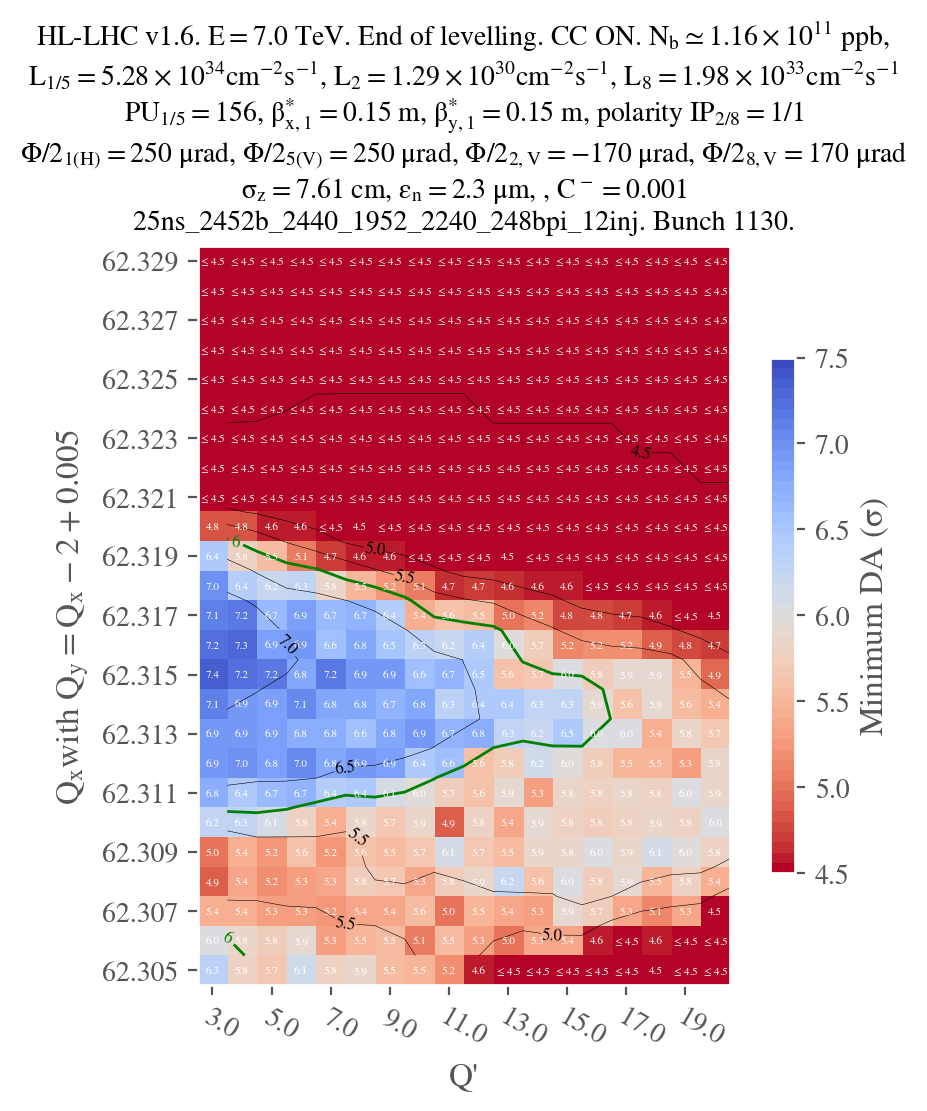

In [5]:
df_to_plot.columns = [str(oct) for oct in l_chroma]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(4.4)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Q'"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    bety = 0.15,
    betx = 0.15,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    levelling = 'End of levelling',
    CC = True,
    display_chroma = False
    #title="opt_collapse_1100_1500_oct_scan",
)